In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
orders = pd.read_csv("../data/processed/clean_orders.csv", parse_dates=["order_purchase_timestamp"])
customers = pd.read_csv("../data/processed/clean_customers.csv")
order_items = pd.read_csv("../data/processed/clean_order_items.csv")
main = pd.read_csv("../data/processed/clean_main_dataset.csv", parse_dates=["order_purchase_timestamp"])

In [3]:
total_customers = customers["customer_id"].nunique()
orders_per_customer = orders.groupby("customer_id")["order_id"].count()
repeat_customers = (orders_per_customer > 1).sum()
avg_orders_per_customer = orders_per_customer.mean()

print(f"Total Customers: {total_customers:,}")
print(f"Repeat Customers: {repeat_customers:,}")
print(f"Average Orders per Customer: {avg_orders_per_customer:.2f}")

Total Customers: 99,441
Repeat Customers: 0
Average Orders per Customer: 1.00


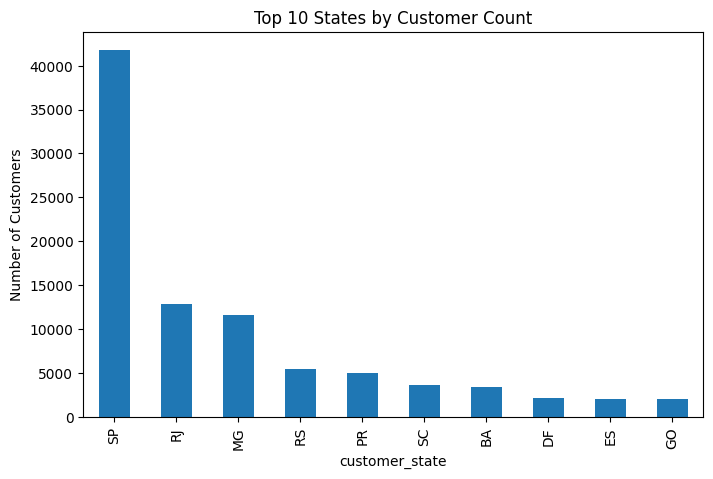

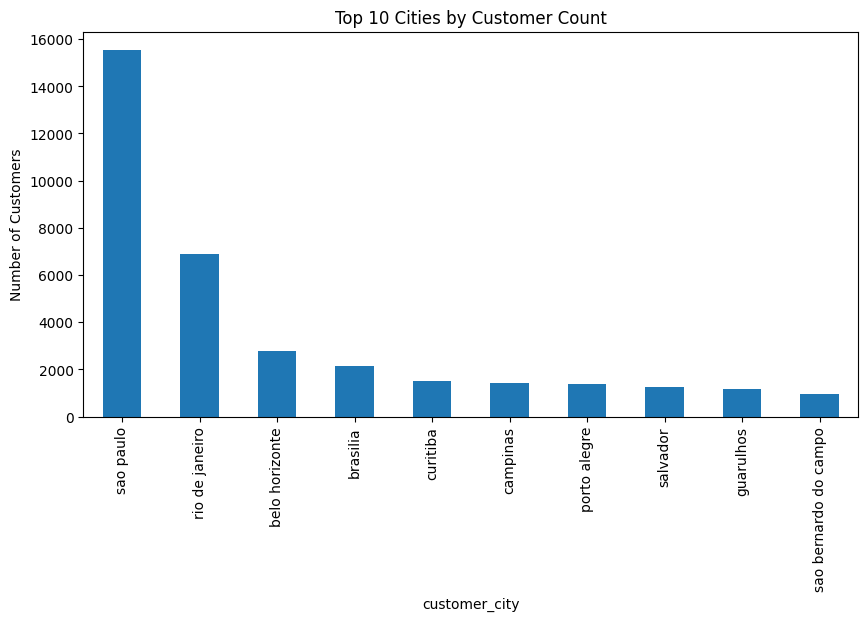

In [4]:
top_states = customers["customer_state"].value_counts().head(10)
top_cities = customers["customer_city"].value_counts().head(10)

top_states.plot(kind="bar", figsize=(8,5), title="Top 10 States by Customer Count")
plt.ylabel("Number of Customers")
plt.show()

top_cities.plot(kind="bar", figsize=(10,5), title="Top 10 Cities by Customer Count")
plt.ylabel("Number of Customers")
plt.show()

In [5]:
order_items["order_value"] = order_items["price"] + order_items["freight_value"]
customer_spending = order_items.merge(orders[["order_id","customer_id"]], on="order_id")
customer_spending = customer_spending.groupby("customer_id")["order_value"].sum()

high_threshold = customer_spending.quantile(0.75)
low_threshold = customer_spending.quantile(0.25)

def segment(value):
    if value >= high_threshold:
        return "High"
    elif value <= low_threshold:
        return "Low"
    else:
        return "Medium"

customer_segments = customer_spending.apply(segment)

print(customer_segments.value_counts())

order_value
Medium    49326
Low       24671
High      24669
Name: count, dtype: int64


In [6]:
customer_orders = orders.groupby("customer_id")["order_id"].count()
customer_total_spent = customer_spending

top_customers = pd.DataFrame({
    "orders": customer_orders,
    "total_spent": customer_total_spent
}).sort_values("total_spent", ascending=False).head(20)

top_customers

,orders,total_spent
customer_id,,
1617b1357756262bfa56ab541c47bc16,1,13664.08
ec5b2ba62e574342386871631fafd3fc,1,7274.88
c6e2731c5b391845f6800c97401a43a9,1,6929.31
f48d464a0baaea338cb25f816991ab1f,1,6922.21
3fd6777bbce08a352fddd04e4a7cc8f6,1,6726.66
05455dfa7cd02f13d132aa7a6a9729c6,1,6081.54
df55c14d1476a9a3467f131269c2477f,1,4950.34
e0a2412720e9ea4f26c1ac985f6a7358,1,4809.44
24bbf5fd2f2e1b359ee7de94defc4a15,1,4764.34


In [7]:
orders_per_customer = orders.groupby("customer_id")["order_id"].nunique()
print("Customers with more than 1 order:", (orders_per_customer > 1).sum())




Customers with more than 1 order: 0


### Customer Insights – Recommendations for Improving Retention

1. **Introduce loyalty programs or discounts for repeat purchases**  
   Encourage customers to come back by offering incentives such as discount codes for second orders, loyalty points, or referral rewards.  

2. **Engage customers with personalized communication**  
   Send follow-up emails or notifications with product recommendations based on their first order. Building a relationship increases the chance they return.  

3. **Improve post-purchase experience**  
   Ensure smooth delivery, provide clear return policies, and ask for feedback. A positive first experience increases the likelihood that customers will order again.  

